# Вариант 1

Загрузить файл с информацией о диабетах и построить модель классификации на основе имеющихся данных.

In [8]:
import pandas as pd

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Вариант 2

Загрузить файлы и информацией о лицах, перевести в тензорный формат и построить модель классификации.

In [9]:
import numpy as np
from PIL import Image

images = np.load('olivetti_faces.npy') # при необходимости укажите свой 

Выведем форму произвольного изображения:

In [10]:
images[359].shape

(64, 64)

Выведем произвольное изображение из датасета

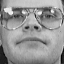

In [11]:
im = Image.fromarray(images[359] * 256)
new_im = im.convert('RGB')

display(new_im)

# Вариант 3

Построить модель линейной регрессии на имеющихся данных

In [12]:
import matplotlib.pyplot as plt

df_x = pd.read_csv('x.csv')
df_y = pd.read_csv('y.csv')

df_x.head()

,Unnamed: 0,0
0,0,1.462108
1,1,1.133769
2,2,-2.301539
3,3,1.744812
4,4,0.042214


In [13]:
df_x = df_x.rename({'Unnamed: 0': "first"}, axis=1)
df_y = df_y.rename({'Unnamed: 0': "first"}, axis=1)

res = pd.merge(df_x, df_y, on = 'first' ) # , on=0)

In [14]:
df_res = res.iloc[:, [1,2]]
df_res.head()

,0_x,0_y
0,1.462108,101.159902
1,1.133769,78.442913
2,-2.301539,-159.238195
3,1.744812,120.719533
4,0.042214,2.920673


Зашумим входные данные

In [15]:
noise = np.random.randint(-100, 340, size=20) / 10
df_res['0_y'] = df_res['0_y'] + noise

C:\Users\194186\AppData\Local\Temp/ipykernel_2408/2561598884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res['0_y'] = df_res['0_y'] + noise


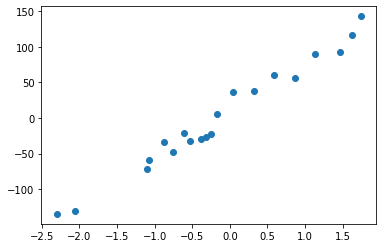

In [16]:
plt.figure()
plt.scatter(df_res['0_x'], df_res['0_y'])
plt.show()

# Отчетность

В первую очередь в работе должна быть продемонстрирована ваша архитектура и процесс обучения (с кратким обоснованием выбора гиперпараметров).


Далее:

(В конце вашего ноутбука укажите следующие данные)

По задачам классификации:

1.  Вывести метрики классификации на тестовом множестве: accuracy, precision, recall и f1-score(для бинарной) и метрик качества для каждого класса, в случае использования датасета с лицами.
2.  Обосновать выбранное соотношение train/test на основе построения кривых обучения (или понятного вывода результатов эксперимента) 



По задаче регрессии:



1.   Вывести коэффициент детерминации и средний квадрат ошибки
2.   Продемнострировать, что выбрано оптимальное соотношение train/test, путем перебора всех содержательных вариантов.



In [33]:
import torch
from torch import nn

In [18]:
xdata=torch.Tensor(df_res['0_x']) 
ydata=torch.Tensor(df_res['0_y'])

In [19]:
def Scatter(): 
    plt.scatter(df_res['0_x'], df_res['0_y'])

In [23]:
#Через модель персептрона
class Perceptron_model(nn.Module):
    def __init__(self,input_size,output_size): 
        super().__init__() 
        self.linear=nn.Linear(input_size,output_size) 
    def forward(self,x): 
        pred=self.linear(X) 
        return pred

In [24]:
def forward(self,x): 
    pred=torch.sigmoid(self.linear(x)) 
    return pred

In [25]:
model= Perceptron_model(2,1) 
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.2646,  0.1122]], requires_grad=True), Parameter containing:
tensor([-0.4309], requires_grad=True)]


In [26]:
torch.manual_seed(2)

In [27]:
[A,B]=model.parameters() 
A1,A2=A.view(2) 
B1=B[0] 
print(A1.item(), A2.item(),B1.item())

-0.2645888030529022 0.11217266321182251 -0.43092891573905945


In [28]:
def get_perameters(): 
    return(A1.item(),A2.item(),B[0].item())

In [29]:
def plotfit(title): 
    plt.title=title 
    A1, A2, B1 = get_perameters()
    x1=np.array([-2.0,2.0]) 
    y1=((A1*x1)+B1)/-A2

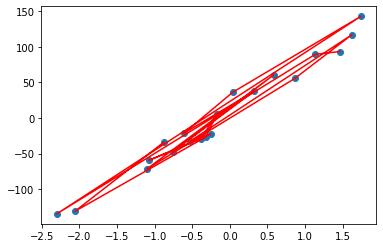

In [39]:
plt.plot(xdata, ydata,'r')  
Scatter()
plotfit('Initial Model')

In [41]:
df.insert(0, 'Theta0', 1)
cols = df.shape[1]
df_x = df.iloc[:,0:cols-1]
df_y = df.iloc[:,cols-1:cols]
theta = np.matrix(np.array([0]*df_x.shape[1]))
df_x = np.matrix(df_x.values)
df_y = np.matrix(df_y.values)

In [44]:
df.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

ValueError: scatter requires an x and y column